# Data Visualization
We'll take a look at two different libraries for data visulization:
* **Matplotlib**: this is probably the most commonly used data visualization package for Python. There are many examples in the [Matplotlib documentation](https://matplotlib.org/). For the examples here, I'll use the `pyplot` module. There are more advanced plotting options (similar to MATLAB) that are well documented in the link above.
* **Seaborn**: this library is actually built on top of Matplotlib with a focus on more statistically oriented plotting. Here is a link to the [Seaborn documentation](https://seaborn.pydata.org/).

Here's a nice [link to a graphic](https://www.slideshare.net/continuumio/taming-the-python-data-visualization-jungle) showing many of the different libraries associated with visualizations for Python.

In [34]:
# import necessary libraries
import pandas as pd # for data frames, reading and writing data
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import numpy as np
from math import sqrt

# the next line is so that the matplot lib plots show up in the notebook cell
%matplotlib inline

## Load Data
Let's use the same sample data that we used before in the Pandas section. We'll load the user data, since that has the most fields and potential for "dirty" data.

In [3]:
filename = 'sample_data.xlsx'
user_df = pd.read_excel(filename, sheet_name='user_data')
tweet_df = pd.read_excel(filename, sheet_name='tweet_data')
tweets_classified = pd.read_excel(filename, sheet_name='tweets_classified')
user_df.head()

,id,id_str,name,screen_name,location,followers_count,friends_count,favourites_count,description,geo_enabled,...,statuses_count,time_zone,created_at,verified,utc_offset,contributors_enabled,listed_count,protected,url,state
0,8192222,8192222,Jezebel,Jezebel,NaN,318516,29,94,All the news you need. Without airbrushing.,0,...,81056,Eastern Time (US & Canada),2007-08-14 22:57:34,1,-14400.0,0,6709,0,http://jezebel.com,NaN
1,11801852,11801852,Jenna Hatfield,JennaHatfield,Cambridge OH,10024,6808,21156,Award winning writer. Editor. Wife. Mom. Dog l...,0,...,106425,Eastern Time (US & Canada),2008-01-03 15:51:49,0,-14400.0,0,577,0,http://stopdropandblog.com,Ohio
2,12366342,12366342,King County Library,KCLS,King County WA,10442,235,4417,King County Library System (KCLS) is your comm...,1,...,17786,Pacific Time (US & Canada),2008-01-17 17:51:28,0,-28800.0,0,548,0,http://www.kcls.org,Washington
3,14362996,14362996,Alanna Banks,fridaysoffshop,Toronto,765,850,32,Shop Owner at fridaysoff.ca an online source o...,0,...,1946,Quito,2008-04-11 17:49:07,0,-18000.0,0,48,0,http://fridaysoff.ca,NaN
4,15430687,15430687,C.B. Cebulski,CBCebulski,Shanghai China,55961,869,11642,Just a guy lucky enough to work for Marvel. Tr...,0,...,22157,Eastern Time (US & Canada),2008-07-14 19:04:35,1,-14400.0,0,1889,0,http://www.eataku.tumblr.com,NaN


## Super-Simplified Plotting w. Pandas
Pandas has some of basic plotting functionality directly connected to matplotlib. With that, you can create basic plots by calling methods right off of a data frame. Let's create a column in the users table for the month the user was created and then make a quick histogram from that.

### Pandas Histogram

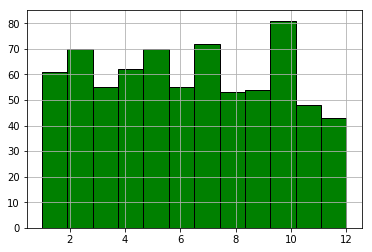

In [5]:
user_df['created_month'] = user_df['created_at'].dt.month
user_df['created_month'].hist(bins=12, color='g', edgecolor='black')

### Pandas Timeseries
Let's take a look at a timeseries plot. Since we don't have a bunch of nice timeseries data in our sample data, let's just create some here. We'll create a dummy dataset with nine rows and 4 columns of random, normal data.

In [10]:
a = np.random.standard_normal((9,4))
df = pd.DataFrame(a)
df.columns=[['No1','No2','No3','No4']]
df

,No1,No2,No3,No4
0,1.051698,0.230585,0.083145,0.237908
1,-1.606782,0.162246,1.266509,0.455493
2,0.125801,-0.201569,1.056197,0.552088
3,1.243513,-1.462613,0.244284,1.392509
4,-0.656687,-0.104306,-1.234692,0.008235
5,-0.951736,-1.050616,-1.094078,0.145730
6,0.429079,0.687712,-1.049565,-0.448173
7,0.204464,-2.912392,-0.158431,1.042374
8,0.014264,0.394617,0.496487,-0.765566


Add a date index to our dummy dataset:

In [11]:
dates = pd.date_range('2018-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', freq='M')

In [12]:
df.index = dates
df

,No1,No2,No3,No4
2018-01-31,1.051698,0.230585,0.083145,0.237908
2018-02-28,-1.606782,0.162246,1.266509,0.455493
2018-03-31,0.125801,-0.201569,1.056197,0.552088
2018-04-30,1.243513,-1.462613,0.244284,1.392509
2018-05-31,-0.656687,-0.104306,-1.234692,0.008235
2018-06-30,-0.951736,-1.050616,-1.094078,0.145730
2018-07-31,0.429079,0.687712,-1.049565,-0.448173
2018-08-31,0.204464,-2.912392,-0.158431,1.042374
2018-09-30,0.014264,0.394617,0.496487,-0.765566


In [13]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.016265,-0.472926,-0.043349,0.291178
std,0.922682,1.144104,0.926278,0.674509
min,-1.606782,-2.912392,-1.234692,-0.765566
25%,-0.656687,-1.050616,-1.049565,0.008235
50%,0.125801,-0.104306,0.083145,0.237908
75%,0.429079,0.230585,0.496487,0.552088
max,1.243513,0.687712,1.266509,1.392509


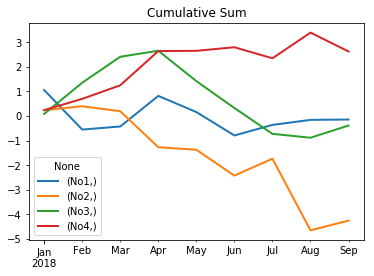

In [16]:
df.cumsum().plot(lw=2, title = "Cumulative Sum")

## Plotting directly with Matplotlib
Pandas did all the work in sorting out that plot with 4 series. Here's how you could do it directly with matplotlib.

Formatting dates can be messy sometimes. Here's a good bit of [example code](https://matplotlib.org/examples/api/date_demo.html) that can help.

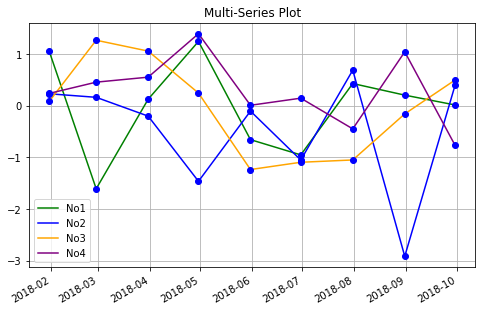

In [49]:
fig, ax = plt.subplots(figsize = (8,5))
# Plot each series individually
plt.plot(df['No1'], color='green', label='No1')
plt.plot(df['No2'], color='blue', label='No2')
plt.plot(df['No3'], color='orange', label='No3')
plt.plot(df['No4'], color='purple', label='No4')
# add markers
plt.plot(df, 'bo')
# Format the date axis
ax.format_xdata = mdates.DateFormatter('%Y-%m')
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
plt.title('Multi-Series Plot')
plt.legend(loc=0)
plt.grid(True)

## Spliting into subplots
Let's say we want this same plot, but splitting into two differnt plots with No1-No2 in one and No3-No4 in the other. We can do this with the `plt.subplot` command. The syntax is plt.sublot(numrows, numcols, fignum).

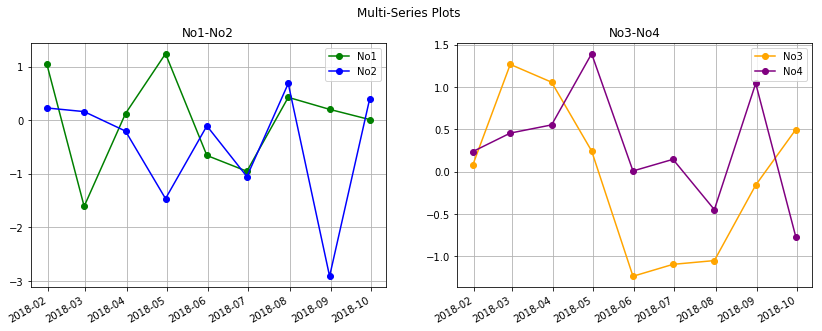

In [63]:
fig, ax = plt.subplots(figsize = (14,5))

# Define the sub-plots - 1 row, two columns, 
# 1st plot
plt.subplot(1,2,1)
plt.plot(df['No1'], color='green', marker='o',label='No1')
plt.plot(df['No2'], color='blue', marker='o', label='No2')
plt.title('No1-No2')
# Format the date axis
ax.format_xdata = mdates.DateFormatter('%Y-%m')
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
plt.suptitle('Multi-Series Plots')
plt.legend(loc=0)
plt.grid(True)

# 2nd plot
plt.subplot(1,2,2)
plt.plot(df['No3'], color='orange',  marker='o',label='No3')
plt.plot(df['No4'], color='purple',  marker='o',label='No4')
plt.title('No3-No4')

# Format the date axis
ax.format_xdata = mdates.DateFormatter('%Y-%m')
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
plt.suptitle('Multi-Series Plots')
plt.legend(loc=0)
plt.grid(True)

## Categorical variable versus a binary variable - Means and Confidence Intervals
From one of Bob's questions: 
* The categories of the categorical variable along the vertical axis
* The mean/percentage of the binary variable (1 values) along the horizontal axis
* Confidence intervals at the ends of the bars

In [64]:
plot_data = tweets_classified.groupby(['topic'])['class'].agg(['mean', 'std', 'count'])
plot_data['sqr_count'] = [sqrt(x) for x in plot_data['count']]
plot_data['SE'] = plot_data['std']/plot_data['sqr_count']
del(plot_data['sqr_count'])
plot_data.sort_values('mean', inplace=True)
plot_data

,mean,std,count,SE
topic,,,,
Divorce,0.057522,0.233354,226,0.015523
Birth,0.135678,0.343310,199,0.024337
Moving,0.183333,0.387748,240,0.025029
Graduation,0.340708,0.474999,226,0.031596
Marriage,0.543568,0.779403,241,0.050206


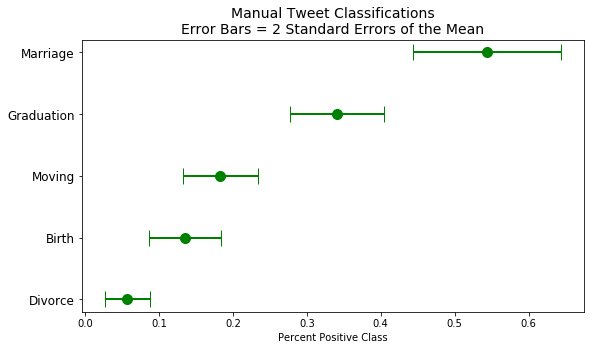

In [65]:
# Plot again using Matplotlib directly
# define the location on the y axis - based on the number of topics
fig, ax = plt.subplots(figsize=(9,5))
y_pos = np.arange(len(plot_data))
class_avg = plot_data['mean']
error = 2*plot_data['SE']

ax.errorbar(class_avg, 
            y_pos,
            xerr=error, 
            capsize = 8,
            fmt='o', 
            markersize=10, 
            linewidth=2, 
            color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_data.index, size=12)
# ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percent Positive Class')
ax.set_title('Manual Tweet Classifications\nError Bars = 2 Standard Errors of the Mean', size=14)

plt.show()

## Box Plots
Let's take a look at box plots of followers_counts by time-zone. First let's look at how many unique time-zone values we have:

In [70]:
user_df.time_zone.value_counts()

Pacific Time (US & Canada)     27
Central Time (US & Canada)     25
Eastern Time (US & Canada)     22
Mountain Time (US & Canada)     7
London                          6
Quito                           5
Atlantic Time (Canada)          4
Beijing                         4
Arizona                         3
Amsterdam                       3
Casablanca                      2
Edinburgh                       2
Seoul                           2
America/Los_Angeles             2
Hawaii                          2
Alaska                          1
Stockholm                       1
Asia/Riyadh                     1
Dublin                          1
America/Toronto                 1
Greenland                       1
Asia/Manila                     1
Lisbon                          1
Jakarta                         1
Urumqi                          1
Melbourne                       1
Pretoria                        1
Indiana (East)                  1
America/New_York                1
Name: time_zon

That's way to many! We'll distill those down to a more reasonable grouping as we did in the QA notebook.

In [72]:
# There are a lot of missing values! Let's mark those as missing for now:
user_df.loc[user_df.time_zone.isna(), 'time_zone'] = 'Missing'

# Create a new value for the grouped time zone so we don't lose the original data.
user_df['grouped_tz'] = 'Other'
user_df.loc[user_df.time_zone=='missing', 'grouped_tz'] = 'Missing'

#Europe
user_df.loc[user_df.time_zone.isin(['London', 'Dublin','Edinburgh','Amsterdam','Stockholm','Lisbon']),
            'grouped_tz'] = 'Europe'
# Eastern & Atlantic
user_df.loc[user_df.time_zone.isin(['Eastern Time (US & Canada)', 'America/New_York','Indiana (East)', 'Atlantic Time (Canada)']),
            'grouped_tz'] = 'Eastern'
# Central
user_df.loc[user_df.time_zone.isin(['Central Time (US & Canada)', 'America/Toronto']),
            'grouped_tz'] = 'Central'
# Pacific, Alaska, Hawaii
user_df.loc[user_df.time_zone.isin(['Pacific Time (US & Canada)', 'America/Los_Angeles','Alaska','Hawaii']),
            'grouped_tz'] = 'Pacific'

### Box Plot - followers_count by Timezone
This a good place to use Seaborn! Many of the faceting and advanced plotting functions we know in ggplot can be done with Seaborn. 

In this plot, we have some users with VERY large followers_counts. To make the plot more interesting, I've zoomed in by limiting the data to those users with less than 2000 followers.

Text(0,0.5,'Followers Count')

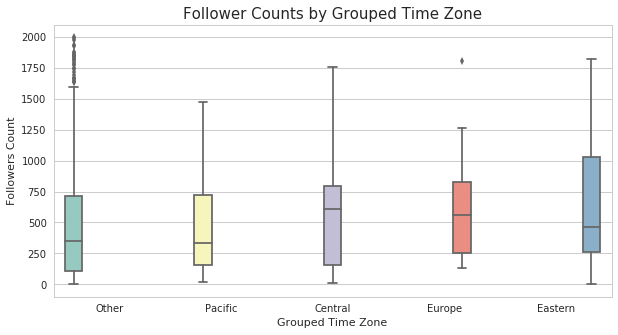

In [106]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style("whitegrid")
ax = sns.boxplot(x='grouped_tz', 
                 y='followers_count', 
                 hue='grouped_tz',
                 data=user_df.loc[user_df.followers_count<2000], 
                 palette="Set3")
ax.legend_ = None
# Set titles
plt.title('Follower Counts by Grouped Time Zone', size=15)
ax.set_xlabel('Grouped Time Zone')
ax.set_ylabel('Followers Count')
